# NLP, DS-поток
## Задание 2
### RNN. Seq2seq и Encoder-Decoder.

**Правила:**

* Дедлайны см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Выполненную работу нужно отправить телеграм-боту `@miptstats_ds23_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. Дождитесь подтверждения от бота, что он принял файл. Если подтверждения нет, то что-то не так. **Работы, присланные иным способом, не принимаются.**
* Дедлайны см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно **ноутбук в формате `ipynb`**.
* Следите за размером файлов. **Бот не может принимать файлы весом более 20 Мб.** Если файл получается больше, заранее разделите его на несколько.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания получат штраф.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* В каждой задаче не забывайте делать **пояснения и выводы**.
* **Код из рассказанных на занятиях ноутбуков** можно использовать без ограничений.


**Правила оформления теоретических задач:**

* Решения необходимо прислать одним из следующих способов:
  * фотографией в правильной ориентации, где все четко видно, а почерк разборчив,
    * отправив ее как файл боту вместе с ноутбуком *или*
    * вставив ее в ноутбук посредством `Edit -> Insert Image` (<font color="red">фото, вставленные ссылкой, не принимаются</font>);
  * в виде $LaTeX$ в markdown-ячейках.
* Решения не проверяются, если какое-то требование не выполнено. Особенно внимательно все проверьте в случае выбора второго пункта (вставки фото в ноутбук). <font color="red"><b>Неправильно вставленные фотографии могут не передаться при отправке.</b></font> Для проверки попробуйте переместить `ipynb` в другую папку и открыть его там.
* В решениях поясняйте, чем вы пользуетесь, хотя бы кратко. Например, если пользуетесь независимостью, то достаточно подписи вида "*X и Y незав.*"
* Решение, в котором есть только ответ, и отсутствуют вычисления, оценивается в 0 баллов.

**Баллы за задание:**

* Задача 1 — 200 баллов

In [1]:
# Bot check

# HW_ID: ds_nlp2
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то.

# Status: final
# Перед отправкой в финальном решении удали "not" в строчке выше.
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную.
# Никакие значения в этой ячейке не влияют на факт сдачи работы.

##### requirements.txt

albucore==0.0.20
albumentations==1.4.21
altgraph @ file:///AppleInternal/Library/BuildRoots/860631e9-c1c5-11ee-98ee-b6ef2fd8d87b/Library/Caches/com.apple.xbs/Sources/python3/altgraph-0.17.2-py2.py3-none-any.whl
annotated-types==0.7.0
appnope==0.1.4
asttokens==2.4.1
blis==1.2.0
catalogue==2.0.10
certifi==2025.1.31
charset-normalizer==3.4.1
click==8.1.8
cloudpathlib==0.20.0
comm==0.2.2
confection==0.1.5
contourpy==1.3.0
cycler==0.12.1
cymem==2.0.11
de_core_news_sm @ https://github.com/explosion/spacy-models/releases/download/de_core_news_sm-3.8.0/de_core_news_sm-3.8.0-py3-none-any.whl#sha256=fec69fec52b1780f2d269d5af7582a5e28028738bd3190532459aeb473bfa3e7
debugpy==1.8.7
decorator==5.1.1
en_core_web_sm @ https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-3.8.0/en_core_web_sm-3.8.0-py3-none-any.whl#sha256=1932429db727d4bff3deed6b34cfc05df17794f4a52eeb26cf8928f7c1a0fb85
eval_type_backport==0.2.0
exceptiongroup==1.2.2
executing==2.1.0
filelock==3.16.1
fonttools==4.54.1
fsspec==2024.10.0
future @ file:///AppleInternal/Library/BuildRoots/860631e9-c1c5-11ee-98ee-b6ef2fd8d87b/Library/Caches/com.apple.xbs/Sources/python3/future-0.18.2-py3-none-any.whl
gensim==4.3.3
huggingface-hub==0.29.1
idna==3.10
importlib_metadata==8.5.0
importlib_resources==6.4.5
ipykernel==6.29.5
ipython==8.18.1
ipywidgets==8.1.5
jedi==0.19.1
Jinja2==3.1.4
joblib==1.4.2
jupyter_client==8.6.3
jupyter_core==5.7.2
jupyterlab_widgets==3.0.13
kiwisolver==1.4.7
langcodes==3.5.0
language_data==1.3.0
macholib @ file:///AppleInternal/Library/BuildRoots/860631e9-c1c5-11ee-98ee-b6ef2fd8d87b/Library/Caches/com.apple.xbs/Sources/python3/macholib-1.15.2-py2.py3-none-any.whl
marisa-trie==1.2.1
markdown-it-py==3.0.0
MarkupSafe==3.0.2
matplotlib==3.9.2
matplotlib-inline==0.1.7
mdurl==0.1.2
mpmath==1.3.0
murmurhash==1.0.12
nest-asyncio==1.6.0
networkx==3.2.1
nltk==3.9.1
numpy==1.26.4
opencv-python-headless==4.10.0.84
packaging==24.1
pandas==2.2.3
parso==0.8.4
pexpect==4.9.0
pillow==11.0.0
platformdirs==4.3.6
portalocker==3.1.1
preshed==3.0.9
prompt_toolkit==3.0.48
psutil==6.1.0
ptyprocess==0.7.0
pure_eval==0.2.3
pydantic==2.9.2
pydantic_core==2.23.4
Pygments==2.18.0
PyMySQL==1.1.1
pyparsing==3.2.0
python-dateutil==2.9.0.post0
pytz==2024.2
PyYAML==6.0.2
pyzmq==26.2.0
regex==2024.11.6
requests==2.32.3
rich==13.9.4
scikit-learn==1.5.2
scipy==1.13.1
seaborn==0.13.2
shellingham==1.5.4
simsimd==6.0.1
six @ file:///AppleInternal/Library/BuildRoots/860631e9-c1c5-11ee-98ee-b6ef2fd8d87b/Library/Caches/com.apple.xbs/Sources/python3/six-1.15.0-py2.py3-none-any.whl
smart-open==7.1.0
spacy==3.8.3
spacy-legacy==3.0.12
spacy-loggers==1.0.5
srsly==2.5.1
stack-data==0.6.3
stringzilla==3.10.7
sympy==1.13.1
thinc==8.3.4
threadpoolctl==3.5.0
tokenizers==0.21.0
torch==2.3.0
torchdata==0.8.0
torchinfo==1.8.0
torchtext==0.18.0
torchvision==0.20.1
tornado==6.4.1
tqdm==4.67.0
traitlets==5.14.3
typer==0.15.1
typing_extensions==4.12.2
tzdata==2024.2
urllib3==2.3.0
wasabi==1.1.3
wcwidth==0.2.13
weasel==0.4.1
widgetsnbextension==4.0.13
wrapt==1.17.2
zipp==3.20.2

## Основной код

In [2]:
import numpy as np
import json
import torch
import torch.nn as nn
import torch.nn.functional as F
from pathlib import Path
from typing import List
from sklearn.model_selection import train_test_split
from tokenizers import Tokenizer
from tokenizers.models import BPE
from tokenizers.trainers import BpeTrainer
from tokenizers.processors import TemplateProcessing
from tokenizers.pre_tokenizers import Whitespace
from torch.utils.data import DataLoader
from torch.nn.utils.rnn import pad_sequence
from random import choice
from tqdm.notebook import tqdm
from string import punctuation
from nltk.tokenize import word_tokenize
import random
from skimage import io
import matplotlib.pyplot as plt
from torchvision.models import resnet50
from torchvision import transforms

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

_____

## Задача 1

В данном домашнем задании вы познакомитесь с задачей __Image captioning__. Она заключается в том, чтобы по изображению сгенерировать его текстовое описание. В большинстве случаев для решения такой задачи используются архитектуры из двух частей &mdash; энкодера, переводящего изображения в векторы, и декодера, генерирующего текст по этим векторам. Поскольку обучать энкодер и декодер вместе или end-to-end&mdash; вычислительно затратная операция, для энкодера мы возьмем уже предобученную нейронную сеть на базе `ResNet`, а вот декодер обучим сами.

Для решения задачи используется датасет COCO (Common Objects in Context), содержащий большое количество изображений для image captioning. Подробнее о наборе данных можно прочитать по [ссылке](https://cocodataset.org/#home).

### Энкодер

Первая часть задачи заключается в переводе изображений в векторы. Как уже было сказано ранее, чтобы упростить вам задачу, мы не будем обучать энкодер, а возьмём предобученные веса для сети. Более того, вы будете использовать уже готовые векторы, которые получены с помощью `resnet50` из `torchvision.models`

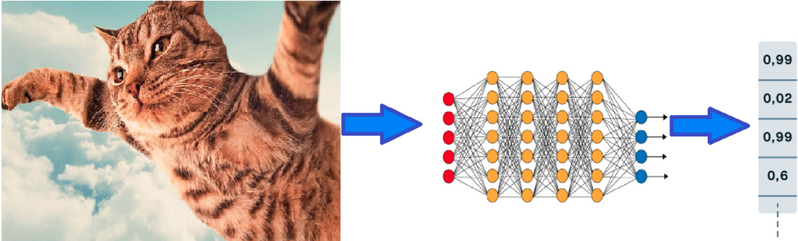


Важно помнить, что перед передачей в сеть изображения нужно предобработать. При этом, у каждой сети свои требования к размеру входного изображения и способу нормирования каналов. Нами был использован следующий препроцессинг:

```
preprocess = torchvision.transforms.Compose((
    torchvision.transforms.Resize(256),
    torchvision.transforms.CenterCrop(224),
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
))
```

В `torchvision.models` содержатся сети, предобученные на задаче классификации. Поэтому мы предварительно удалили из модели последний слой, представив каждое изображения в виде вектора размера 2048. 

*Замечание.* Важно учесть вышеописанные детали для выполнения последнего пункта домашнего задания.

Для удобства использования в Colab данные можной найти по [ссылке](https://drive.google.com/drive/folders/1-4IEvurdITwO_bDvGbtwOpymR0YND0J0?usp=drive_link) на Google Drive. Загрузим полученные векторы изображений и описания.

In [3]:
data_path = Path('../input/nlp2-data/data').resolve()
encoded_images = np.load(data_path / "encoded_images.npy")

with (data_path / "captions.json").open("r", encoding="utf-8") as f:
    captions = json.load(f)

Убедимся, что векторы для всех изображений имеют размер 2048.

In [4]:
print("Размерность всех данных", encoded_images.shape)
print(encoded_images[0, :10])

Размерность всех данных (118287, 2048)
[0.21027014 0.39289975 0.07608727 0.8199058  0.98774576 0.831893
 0.305828   0.19179453 0.4764485  0.1657095 ]


Каждое изображение имеет 5 вариантов текстового описания.

In [5]:
print('\n'.join(captions[42]))

A street sign on a pole on a street.
Two green and white street signs with building in background.
A city street has an intersection sign on a pole.
Street signs near tall buildings on the corner of Greenwich St and Vesey St.
A Greenwich street and Vesey street sign are hanging on a pole.


Давайте попробуем прикинуть, сколько уникальных слов встречается в описаниях. Учтите, что слова могут быть в разном регистре и содержать знаки препинания при наивном разбиении по пробелу.

In [6]:
cap_joined = ' '.join([sent for cap in captions for sent in cap]).lower()
words = [w for w in word_tokenize(cap_joined) if w not in set(punctuation)]

word_set = set(words)
print(len(word_set))

29593


Заметим, что слов очень много. На каждом шаге декодера нам приходиться решать задачу классификации на большое количество классов. А брать софтмакс от вектора такой большой размерности затруднительно. Поэтому имеется несколько вариантов: простой (1), очень простой (2) и современный (3) .

1. Отбросить редко встречающиеся слова (токены) и заменить их все на токен \<UNK\>. 

2. Использовать в качестве токенов символы, а не слова. Такую модель мы использовали на семинаре для простой задачи генерации имён.
Этот подход имеет явный недостаток — модели, обучаемой на отдельных символах, гораздо сложнее выучить соотношения между буквами в каждом отдельном слове. Из-за этого может возникнуть ситуация, при которой значительная часть слов, сгенерированных моделью, не будут являться словами языка, на котором написаны входные тексты.

3. Использовать [Byte Pair Encoding](https://arxiv.org/pdf/1508.07909.pdf).

Разберём, как работает BPE на примере строки `aaabdaaabac`.
Пара `aa` встречается чаще всего, поэтому она будет заменяется символом `Z`, который не используется в данных, получается строка `ZabdZabac`.
Далее процесс повторяется для пары `ab`, которая заменяется на символ `Y`. Теперь строка имеет вид `ZYdZYac`, причем единственная оставшаяся пара исходных символов встречается только один раз. На этом кодировку можно остановить или же продолжать рекурсивно заменив `ZY` на `X`: `XdXac`. Полученную строку нельзя продолжать сжимать, поскольку не существует пары символов, встречающихся более одного раза. Для декодирования нужно выполнить замены в обратном порядке.

Если же мы будем проделывать эту процедуру не над маленькой строкой, а над большим датасетом, то мы найдем часто встречающиеся n-gram-ы из символов в датасете. Полученные замены будем использовать как новые токены и представлять каждое слово как последовательность таких токенов.
В данном случае получится, что частые слова скорей всего будут представлены лишь одним токеном, равным самому слову. А редкие слова разобъются на последовательность токенов, являющихся частыми.

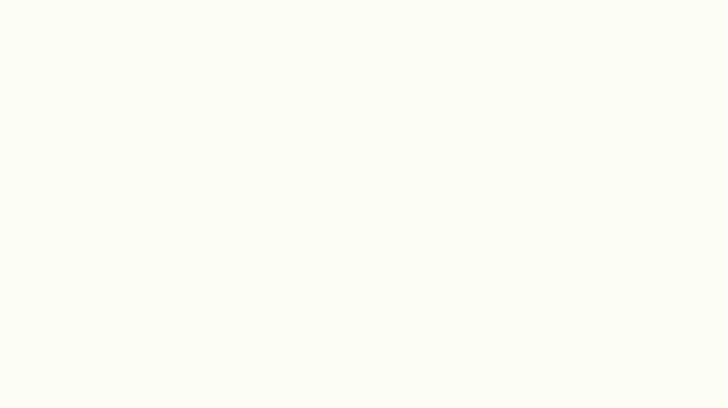

Метод BPE является некоторой золотой серединой между character-based и word-based подходами.

[`YouTokenToMe`](https://github.com/VKCOM/YouTokenToMe) — одна из опен-сорсных реализаций от разработчиков из VK.

[`tiktoken`](https://github.com/openai/tiktoken) – реализация BPE-токенизатора от OpenAI, который используется для их моделей.

[`SentencePiece`](https://github.com/google/sentencepiece) – реализация от Google.

[`tokenizers`](https://github.com/huggingface/tokenizers) – очень популярная реализация различных алгоритмов токенизации от HuggingFace.


Попробуем заиспользовать последнюю библиотеку и обучим собственный BPE-токенизатор. Для начала инициализируем объект нашего токенизатора.

In [7]:
tokenizer = Tokenizer(BPE(unk_token="[UNK]"))

Создадим трейнер для последующего обучения. Ему можно указать такие параметры как размер словаря, а также спец. токены. Более подробно можно прочесть по [ссылке](https://huggingface.co/docs/tokenizers/en/api/trainers).

`[UNK]` — слово, не встречающееся в словаре; \
`[BOS]` — начало текста; \
`[EOS]` — конец текста; \
`[PAD]` — пустой токен.

In [8]:
trainer = BpeTrainer(vocab_size=20_000, special_tokens=["[UNK]", "[BOS]", "[EOS]", "[PAD]"])

Мы можем обучить наш токенизатор прямо сейчас, но это было бы не совсем грамотно. Без некоторй предварительной обработки, которая, например, разделила бы наши входные тексты на слова, мы могли бы получить токены, которые включают в себя несколько слов: например, мы могли бы получить токен `it is`, поскольку эти два слова часто появляются рядом друг с другом. Чтобы такого не произошло, зададим разбиение по пробелу как один из предварительных этапов обучения токенизатора.

In [9]:
tokenizer.pre_tokenizer = Whitespace()

Приведем для простоты тексты к нижнему регистру, объединим в один список и обучим токенизатор на наших описаниях.

In [10]:
merged_captions = [caption.lower() for img_captions in captions for caption in img_captions]
tokenizer.train_from_iterator(merged_captions, trainer)

Посмотрим на пример работы. Чтобы получить список токенов нужно позвать `.ids`.

In [11]:
output = tokenizer.encode(merged_captions[42])
print(merged_captions[42])
print(f"Разбиение по токенам: {output.ids}")
print(f"Токены: {output.tokens}")
print(f"Начальный текст: {tokenizer.decode(output.ids)}")

output = tokenizer.encode("hello, y'all! how are you 😁 ?")
print(f"Разбиение по токенам: {output.ids}")
print(f"Токены: {output.tokens}")
print(f"Начальный текст: {tokenizer.decode(output.ids)}")

a pole with a clock that reads 6:10 by a white car. 
Разбиение по токенам: [40, 761, 84, 40, 349, 181, 1757, 25, 29, 4631, 207, 40, 160, 219, 17]
Токены: ['a', 'pole', 'with', 'a', 'clock', 'that', 'reads', '6', ':', '10', 'by', 'a', 'white', 'car', '.']
Начальный текст: a pole with a clock that reads 6 : 10 by a white car .
Разбиение по токенам: [4751, 15, 64, 10, 106, 4, 2251, 121, 2341, 0, 33]
Токены: ['hello', ',', 'y', "'", 'all', '!', 'how', 'are', 'you', '[UNK]', '?']
Начальный текст: hello , y ' all ! how are you ?


Мы уже знаем, что на этапе обучения и инференса мы добавляем специальные токены. На самом деле этот процесс можно автоматизировать. Токенизатор сам добавит специальные токены, если аккуратно настроить постпроцессинг. Для нашего случая он может выглядеть так:

In [12]:
tokenizer.post_processor = TemplateProcessing(
    single="[BOS] $A [EOS]",
    special_tokens=[
        ("[BOS]", tokenizer.token_to_id("[BOS]")),
        ("[EOS]", tokenizer.token_to_id("[EOS]")),
    ],
)

output = tokenizer.encode(merged_captions[42])
print(merged_captions[42])
print(f"Разбиение по токенам: {output.ids}")
print(f"Токены: {output.tokens}")
print(f"Начальный текст: {tokenizer.decode(output.ids)}")

a pole with a clock that reads 6:10 by a white car. 
Разбиение по токенам: [1, 40, 761, 84, 40, 349, 181, 1757, 25, 29, 4631, 207, 40, 160, 219, 17, 2]
Токены: ['[BOS]', 'a', 'pole', 'with', 'a', 'clock', 'that', 'reads', '6', ':', '10', 'by', 'a', 'white', 'car', '.', '[EOS]']
Начальный текст: a pole with a clock that reads 6 : 10 by a white car .


Теперь вам предстоит токенизировать наши текстовые описания. Воспользуйтесь методом `tokenizer.encode_batch`, чтобы токенизировать сразу какой-то батч текстов, ведь у нас целых 5 описаниий на каждую картинку. Не забудьте про то, что мы обучали токенизатор для текстов в нижнем регистре.

In [13]:
# tokenized_captions: List[List[int]] = <...>
tokenized_captions = [[enc.ids for enc in tokenizer.encode_batch([c.lower() for c in cs])] for cs in captions]

assert len(tokenized_captions) == len(encoded_images), "Токенизируете описания, объединенные в один список"

### Архитектура декодера

В качестве модели будем использовать `CaptionNet`.

![img](https://raw.githubusercontent.com/yunjey/pytorch-tutorial/master/tutorials/03-advanced/image_captioning/png/model.png)


Эта архитектура &mdash; своеобразная модификация привычной Encoder-Decoder архитектуры на базе RNN. Основная особенность &mdash; начальные скрытые  состояния LSTM вычисляются по изображению при помощи свёрточной нейронной сети. Мы уже получили векторы изображений в первой части задания. Поэтому сейчас нам не придётся использовать свёрточные слои в явном виде.


In [14]:
class CaptionNet(nn.Module):
    def __init__(self, n_tokens, emb_size=128, lstm_units=256, cnn_feature_size=2048):
        """ 
        Инициализация CaptionNet. Параметры:
        1) n_tokens - размер словаря для текстовых описаний,
        2) emb_size - размер эмбеддингов для токенов из словаря,
        3) lstm_units - размер скрытого состояния LSTM,
        4) cnn_features_size - размер эмбеддинга изображений.
        """
        super(self.__class__, self).__init__()
        # линейный слой, переводящий эмбеддинг картинки в вектор, 
        # который будет использован как начальное состояние h (hidden state) в LSTM
        self.cnn_to_h0 = nn.Linear(cnn_feature_size, lstm_units)
        # линейный слой, переводящий эмбеддинг картинки в вектор, 
        # который будет использован как начальное состояние c (cell state) в LSTM
        self.cnn_to_c0 = nn.Linear(cnn_feature_size, lstm_units)
        # эмбеддинги для токенов описаний
        self.emb = nn.Embedding(n_tokens, emb_size)
        # рекуррентный слой
        self.lstm = nn.LSTM(emb_size, lstm_units, batch_first=True)
        # слой для вычисления логитов
        self.logits = nn.Linear(lstm_units, n_tokens)
        
    def forward(self, image_vectors, captions_ix):
        """ Применение сети """
        initial_cell, initial_hid = self.cnn_to_c0(image_vectors), self.cnn_to_h0(image_vectors)
        # получим эмбеддинги описаний
        captions_emb = self.emb(captions_ix)
        # применяем lstm, в качестве начальных состояний берем initial_cell и initial_hid
        lstm_out, _ = self.lstm(captions_emb, (initial_hid.unsqueeze(0),initial_cell.unsqueeze(0)))
        # вычислим логиты
        logits = self.logits(lstm_out)
        return logits        

Инициализируем сеть.

In [15]:
VOCAB_SIZE = tokenizer.get_vocab_size()
PAD_IDX = tokenizer.token_to_id("[PAD]")

In [16]:
caption_net = CaptionNet(n_tokens=VOCAB_SIZE).to(device)

Сгенерируем случайные векторы для простого тестирования модели.

In [17]:
dummy_img_vec = torch.randn(len(tokenized_captions[0]), 2048).to(device)
dummy_capt_ix = pad_sequence(
        [torch.LongTensor(t).to(device) for t in tokenized_captions[0]],
        padding_value=PAD_IDX,
        batch_first=True
    ).to(device)

dummy_logits = caption_net.forward(dummy_img_vec, dummy_capt_ix)
print("shape:", dummy_logits.shape)
assert dummy_logits.shape == (dummy_capt_ix.shape[0], dummy_capt_ix.shape[1], tokenizer.get_vocab_size())

shape: torch.Size([5, 14, 20000])


Реализуем вычисление функции потерь.

In [18]:
def compute_loss(caption_net, image_vectors, captions_ix):
    """ Подсчёт функции потерь """
    image_vectors, captions_ix = image_vectors.to(device), captions_ix.to(device) 
    
    # получим логиты, применив сеть
    logits = caption_net(image_vectors, captions_ix)
    
    # обратите внимание, что bos мы не предсказываем!
    # то, что модель сгенерировала после обработки eos тоже не нужно учитывать в лоссе!
    # нужно использовать сдвиг тк tokens < n предсказывают n
    shift_logits = logits[:,:-1,:].contiguous()  # ловил ошибку, нужно contiguous in memory
    shift_captions = captions_ix[:,1:].contiguous()  # тут тоже

    loss = F.cross_entropy(
        shift_logits.view(-1, VOCAB_SIZE), 
        shift_captions.view(-1), 
        ignore_index=PAD_IDX
    )
    
    return torch.stack([loss])

Посчитаем функцию потерь на простом примере.

In [19]:
dummy_loss = compute_loss(caption_net, dummy_img_vec, dummy_capt_ix)
dummy_loss.backward()

Инициализируем оптимизатор для нейронной сети. 

In [20]:
optim = torch.optim.Adam(caption_net.parameters(), lr=1e-4)

### Обучение модели

Разделим данные на обучение и валидацию. Отведём на валидацию 20% данных.

In [21]:
train_img_codes, val_img_codes, train_captions, val_captions = train_test_split(encoded_images, tokenized_captions, test_size=0.2)

Реализуем кастомную collate-функцию.

In [22]:
def choice_pad_collate(batch):
    """
    Формирует тензоры из вектора изображения и токенизированных описаний,
    сэмплирует одно случайное описание для изображения, а также
    дополняет последовательности токенов до макс. длины в батче с PAD_IDX
    """
    batch_images, batch_captions = zip(*batch)
    # берём для каждого изображения ровно одно случайное описание
    # batch_captions перед pad_sequence имеет тип List[torh.LongTensor]
    batch_captions = [torch.LongTensor(np.array(random.choice(cs))).to(device) for cs in batch_captions]
    # дополним до макс. длины в батче
    batch_tensors = pad_sequence(batch_captions, batch_first=True, padding_value=PAD_IDX)
    return torch.FloatTensor(np.array(batch_images)).to(device), batch_tensors

Зададим даталоадеры и посмотрим, как выглядит батч.

In [23]:
train_loader = DataLoader(
    list(zip(train_img_codes, train_captions)),
    shuffle=True,
    batch_size=64,
    collate_fn=choice_pad_collate
)

valid_loader = DataLoader(
    list(zip(val_img_codes, val_captions)),
    shuffle=False,
    batch_size=64,
    collate_fn=choice_pad_collate
)

In [24]:
next(iter(train_loader))

(tensor([[0.8966, 0.4427, 1.8007,  ..., 0.2935, 0.0910, 0.6884],
         [0.3197, 0.9660, 0.8024,  ..., 0.2003, 1.8450, 0.1830],
         [0.1532, 0.2594, 0.1310,  ..., 0.1117, 0.4193, 0.2154],
         ...,
         [0.8815, 0.5881, 1.0156,  ..., 0.4997, 0.3342, 0.1610],
         [0.5464, 0.9707, 1.0291,  ..., 0.4740, 1.0741, 1.6617],
         [0.1121, 0.3739, 0.2557,  ..., 0.4349, 0.0548, 0.0513]],
        device='cuda:0'),
 tensor([[   1,   40,  196,  ...,    3,    3,    3],
         [   1, 1614, 1392,  ...,    3,    3,    3],
         [   1,   68,  770,  ...,    3,    3,    3],
         ...,
         [   1,   40,  377,  ...,    3,    3,    3],
         [   1,   40,  165,  ..., 1532,   17,    2],
         [   1,   40, 3554,  ...,    3,    3,    3]], device='cuda:0'))

Размер батча и количество эпох можно варьировать в зависимости от имеющихся вычислительных ресурсов. Однако, чтобы добиться более-менее нормального результата обучать модель следует хотя бы 3-5 эпох.

In [25]:
n_epochs = 5
checkpoint_path = "model_ckeckpoint.pt"
best_val_loss = 1000.0

for epoch in range(n_epochs):
    train_loss = 0
    caption_net.train(True)
    
    pbar = tqdm(train_loader)
    for batch in pbar:
        loss_t = compute_loss(caption_net, *batch)  # считаем лосс
        optim.zero_grad()
        loss_t.backward()  # делаем обратное распространение ошибки
        optim.step()  # делаем шаг оптимизатора
        train_loss += loss_t.item()
        pbar.set_postfix({"loss": loss_t.item()})

    train_loss /= len(train_loader)

    val_loss = 0
    caption_net.train(False)
    for batch in tqdm(valid_loader):
        with torch.inference_mode():
            loss_t = compute_loss(caption_net, *batch)
        val_loss += loss_t.item()
    val_loss /= len(valid_loader)

    print(f"\nЭпоха: {epoch}, train loss: {train_loss:.3f}, val loss: {val_loss:.3f}")

    if val_loss < best_val_loss:
        torch.save(caption_net.state_dict(), checkpoint_path)
        best_val_loss = val_loss
        print(f"Чекпоинт сохранен в {checkpoint_path}")

  0%|          | 0/1479 [00:00<?, ?it/s]

  0%|          | 0/370 [00:00<?, ?it/s]


Эпоха: 0, train loss: 4.934, val loss: 4.244
Чекпоинт сохранен в model_ckeckpoint.pt


  0%|          | 0/1479 [00:00<?, ?it/s]

  0%|          | 0/370 [00:00<?, ?it/s]


Эпоха: 1, train loss: 3.966, val loss: 3.732
Чекпоинт сохранен в model_ckeckpoint.pt


  0%|          | 0/1479 [00:00<?, ?it/s]

  0%|          | 0/370 [00:00<?, ?it/s]


Эпоха: 2, train loss: 3.563, val loss: 3.431
Чекпоинт сохранен в model_ckeckpoint.pt


  0%|          | 0/1479 [00:00<?, ?it/s]

  0%|          | 0/370 [00:00<?, ?it/s]


Эпоха: 3, train loss: 3.324, val loss: 3.244
Чекпоинт сохранен в model_ckeckpoint.pt


  0%|          | 0/1479 [00:00<?, ?it/s]

  0%|          | 0/370 [00:00<?, ?it/s]


Эпоха: 4, train loss: 3.173, val loss: 3.125
Чекпоинт сохранен в model_ckeckpoint.pt


### Применение обученной модели 

На этом этапе мы попытаемся применить обученную сеть к своим изображениям. Для начала загрузим сеть, с использованием которой была выполнена векторизация изображений. Вам потребуется `torchvision.models.resnet50`. Обратите внимание на некоторые детали, описанные в части про энкодер.



In [26]:
class VectorizerModel():
    def __init__(self):
        # предобученный резнет без ласт слоя
        self.model = torch.nn.Sequential(*(list(resnet50(pretrained=True).children())[:-1])).to(device)
        self.model.eval()  # хотим только инференс
        self.preprocess = transforms.Compose((
            transforms.Resize(256),
            transforms.CenterCrop(224),
            # transforms.ToTensor(),
            transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
        ))
        
    def forward(self, image):
        image = self.preprocess(image)
        image = image.unsqueeze(0).to(device)
        with torch.no_grad():
            vector = self.model(image)
        return vector.squeeze().to(device)  #.cpu().numpy()
        
vectorizer_model = VectorizerModel()

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 198MB/s] 


### Генерация описаний

На занятии мы обсужали некоторые стратегии декодирования или генераций. Жадная генерация, при которой на каждом шаге выбирается токен с наибольшей вероятностью, оказывается не самым лучшим выбором. На сегодня существуют разные способы генерации, такие как сэмплирование с темпераутрой, Top-p (nucleus) sampling, Top-K sampling, Beam-Search. По [ссылке](https://huggingface.co/blog/how-to-generate) можно изучить обзор методов генерации от Hugging Face. С самой библиотекой `transformers` мы познакомимся чуть позже.

Реализуем функцию для генерации текстовых описаний по изображению. Вам потребуется реализовать жадную генерацию, а также cэмплирование с температурой (softmax с температурой). Это довольно популярный подход к сэмплированию, который заключается в том, чтобы перед применением функции softmax произвести деление на некоторое $\tau$ &mdash; температуру.

$$\frac{\exp{x_i}}{\sum_{j=1}^N \exp{x_j}} \to \frac{\exp{\frac{x_i}{\tau}}}{\sum_{j=1}^N \exp{\frac{x_j}{\tau}}} $$

С помощью варьирования температуры можно искать баланс между уверенностью модели и разнообразием получаемых генераций. Подумайте, что будет, если использовать $\tau=1$? А если взять $\tau$ слишком большим или приблизить к нулю?

*Чем больше температура, тем больше вероятноть редких слов (более разнообразен выход), но при этом больше шума (и при бесконечной температуре выходит полная бессмыслица)*  
*Чем ниже температура, тем наоборот - ниже вероятноть редких слов, и выход менее разнообразный, но зато более уверенный. Тем не менее, речь не получается "живой"*   
*При температуре =1 модель ведет себя некоторым промежуточным образом*

In [30]:
def generate_caption(image, caption_prefix=[], temp=1, sample=True, max_tokens=100):
    """
    Генерация описаний изображений. Параметры:
    1) image - изображение в формате RGB,
    2) caption_prefix - начало сгенерированного текста,
    3) temp - температура,
    4) sample - при установке в True сэмплирует следующий токен на каждом этапе,
    иначе - применяет жадный алгоритм,
    5) max_tokens - максимальное количество токенов в итоговом описании.
    """
    assert isinstance(image,np.ndarray)
    # assert np.max(image)<=1  # внутри vectorizer_model.forward
    # assert np.min(image)>=0  # внутри vectorizer_model.forward
    assert image.shape[-1]==3

    with torch.inference_mode():  # отключим вычисление градиентов
        image = torch.FloatTensor(image.transpose([2,0,1])).to(device)  # преобразуем изображение в тензор
        vectors_neck = vectorizer_model.forward(image).to(device)  #[None])
        caption_prefix = list(caption_prefix)
        
        for _ in range(max_tokens):
            prefix_ix = torch.LongTensor([tokenizer.encode(" ".join(caption_prefix)).ids[:-1]]).to(device)  # токенизатор сразу добавляет [BOS] и [EOS]
            # вычисляем логиты и вероятности всех токенов словаря и применяем температуру
            next_word_logits = caption_net(vectors_neck.unsqueeze(0), prefix_ix).squeeze(0) / temp
            next_word_probs = F.softmax(next_word_logits, dim=0).cpu().numpy()[0]
            next_word_probs = next_word_probs / next_word_probs.sum()
            assert len(next_word_probs.shape) == 1, f"Вектор вероятностей должен быть одномерным: {next_word_probs.shape}"
            next_word = np.random.choice(len(next_word_probs), p=next_word_probs) if sample else np.argmax(next_word_probs)  # генерируем следующий токен описания
            next_word = tokenizer.id_to_token(next_word)
            caption_prefix.append(next_word)  # добавляем сгенерированный токен в ответ
            if next_word == "[EOS]":  # если увидели токен конца текста, завершаем процесс
                break
            
    return caption_prefix

А теперь возьмите 5 любых изображений из интернета, желательно, сильно отличающихся друг от друга, и сгенерируйте для них несколько описаний с разными параметрами температуры $\tau$.

In [31]:
images = [io.imread(link) for link in [
    'https://duendebymadamzozo.com/dbmzz-content/uploads/2017/10/Myanmar-Fisherrman-Inle-Lake-1.jpg',
    'https://cdn.esawebb.org/archives/images/screen/weic2216b.jpg',
    'https://storage.googleapis.com/joblist-content/hero-images/office-job-in-2021.png',
    'https://cs14.pikabu.ru/post_img/2022/03/15/8/1647346779140391073.jpg',
    'https://upload.wikimedia.org/wikipedia/commons/a/a4/Mandel_zoom_11_satellite_double_spiral.jpg'
]]

def show(temp):
    fig, axs = plt.subplots(5,1,figsize=(16,12))
    fig.suptitle(f'Температура: {temp}')
    axs = axs.flatten()
    for ax,img in zip(axs,images):
        ax.imshow(img)
        cap = generate_caption(img, caption_prefix=[], temp=temp, max_tokens=45)
        cap = ' '.join(cap[:15]) + '\n' + ' '.join(cap[15:30]) + '\n' + ' '.join(cap[30:45])
        ax.set_title(cap)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

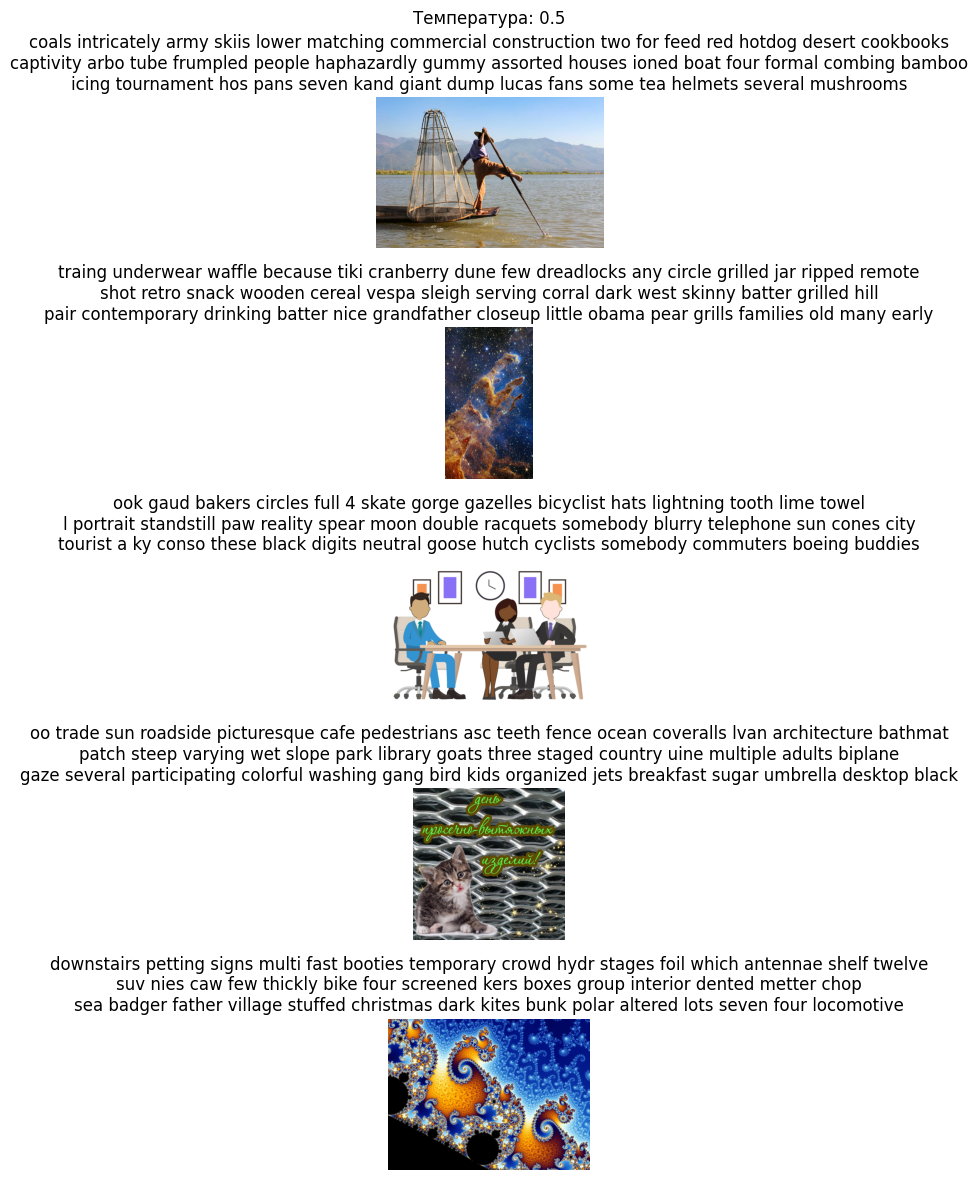

In [32]:
show(temp=0.5)

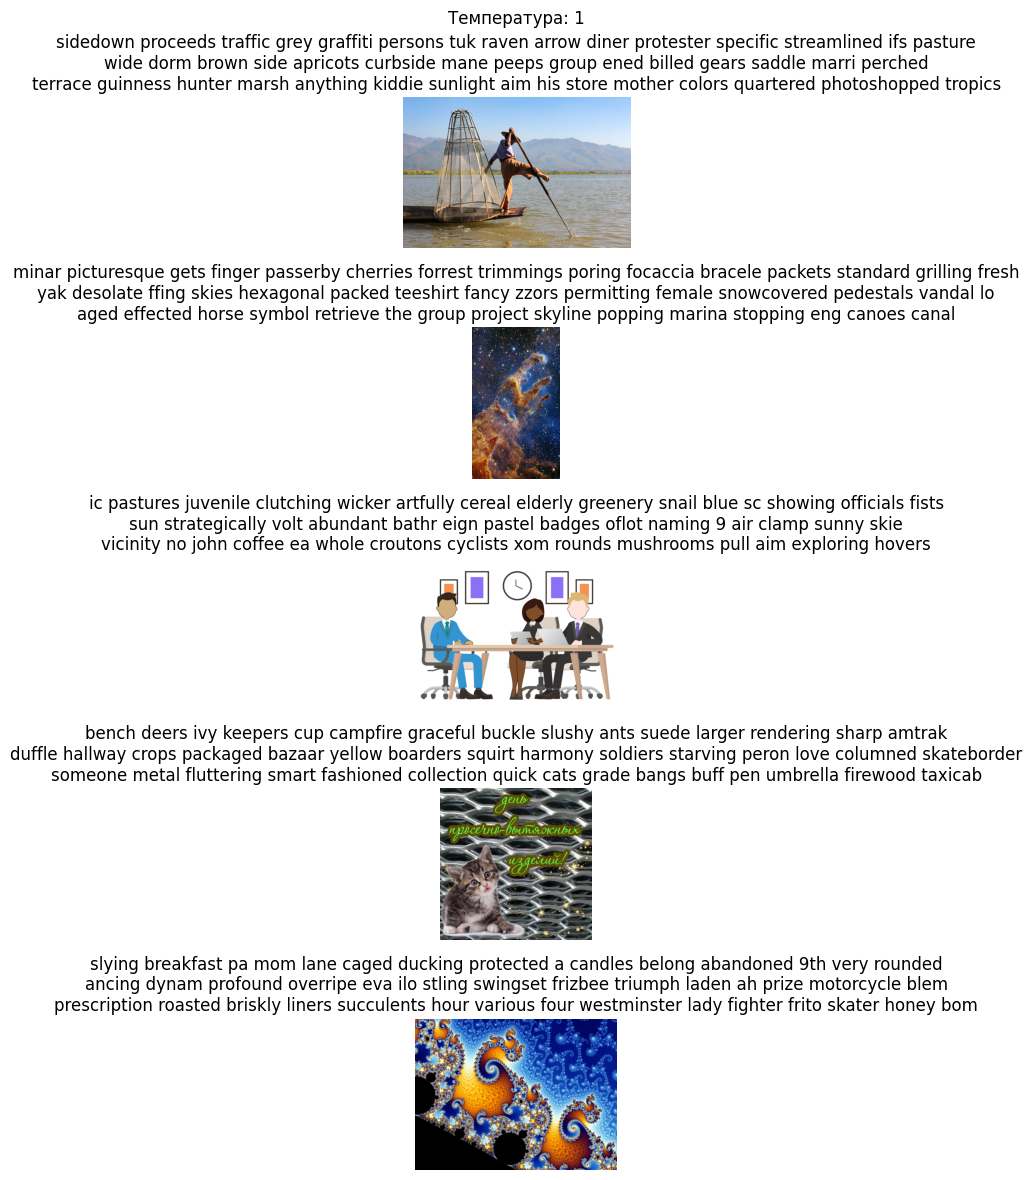

In [33]:
show(temp=1)

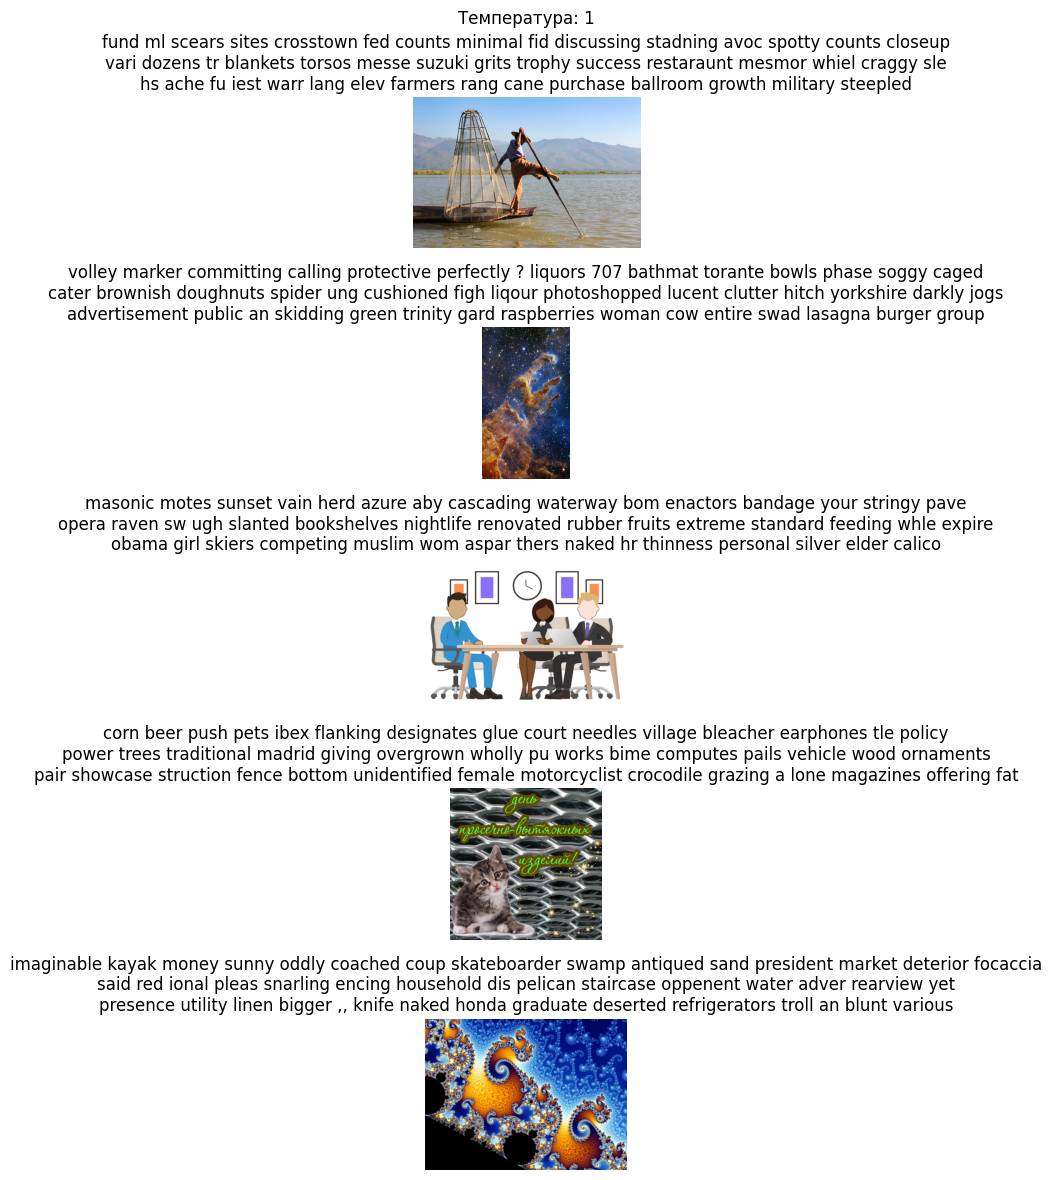

In [34]:
show(temp=1)

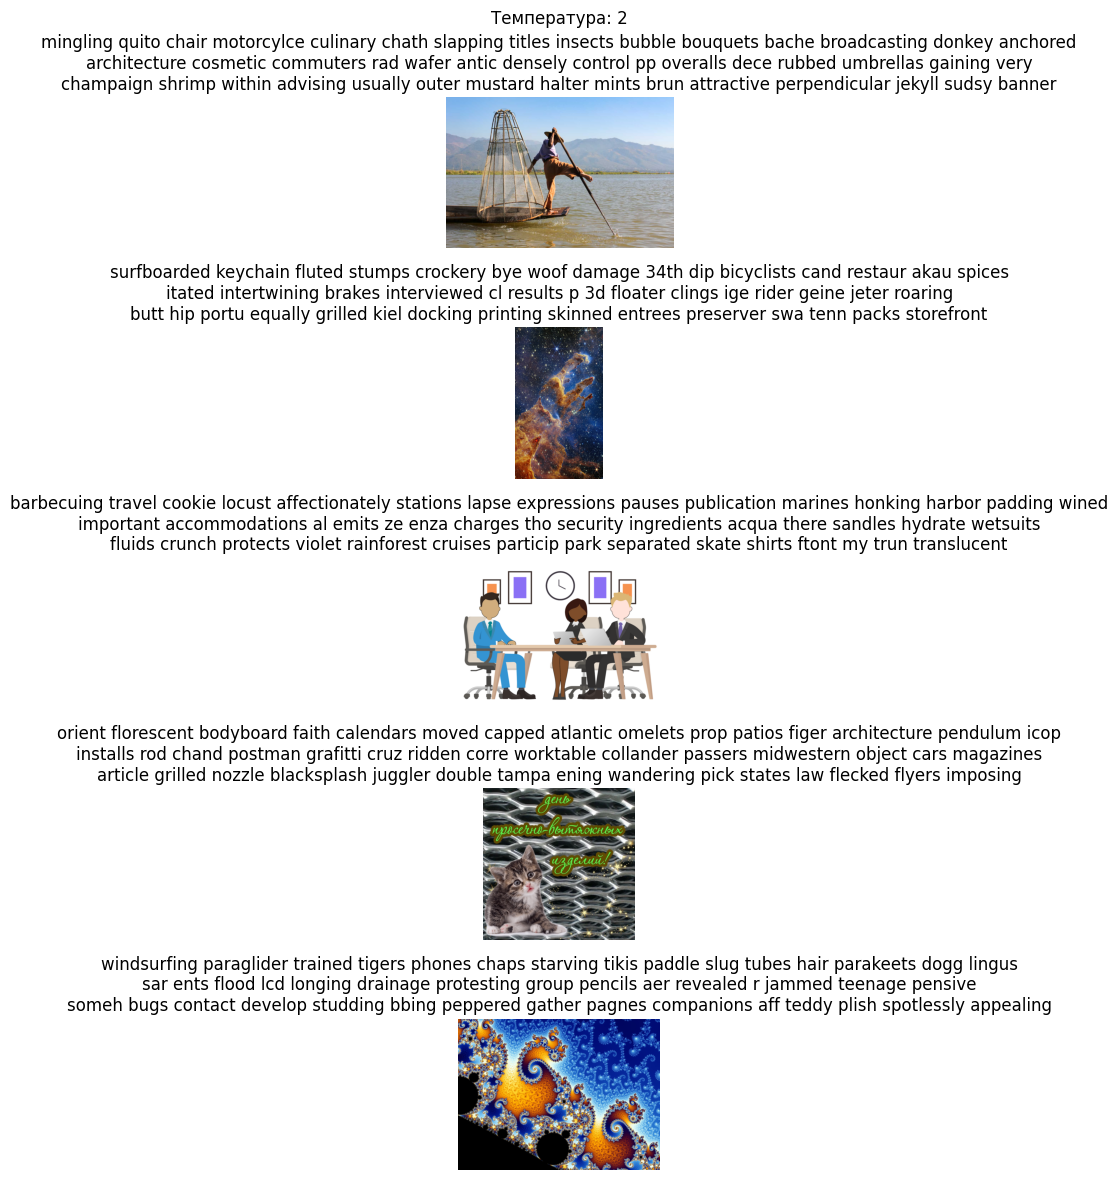

In [35]:
show(temp=2)

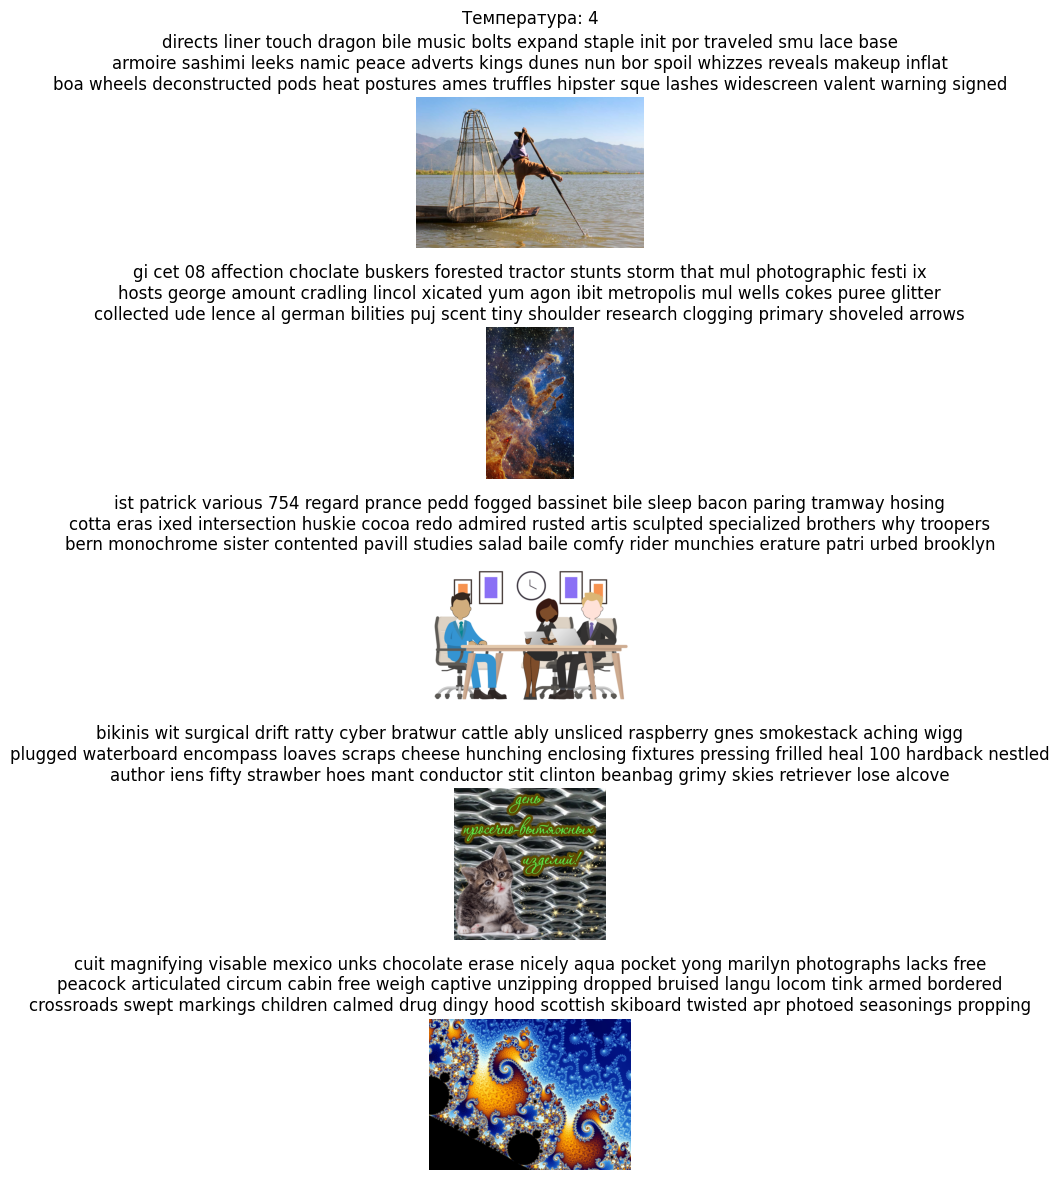

In [36]:
show(temp=4)

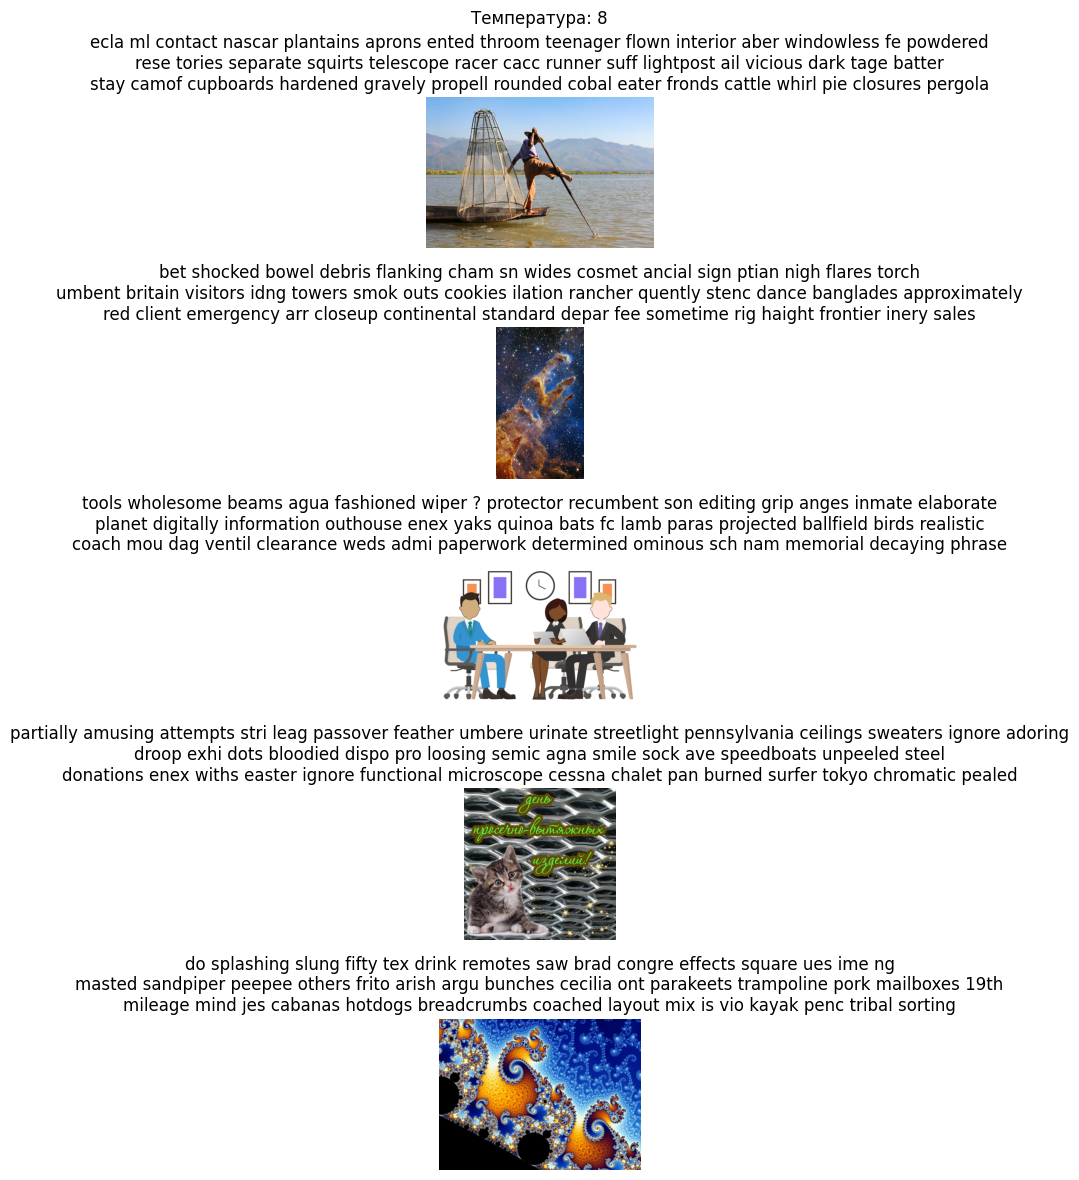

In [37]:
show(temp=8)

Наконец, реализуйте Beam-search и примените его для генерации. Сравните свою реализацию Beam-search c `beam_size=1` и реализованную процедуру жадной генерации. Что можно сказать?

In [ ]:
beam_size = 4

<...>  # !!!!

**Выводы:** *в этой задаче удалось познакомиться с генерацией текста с помощью lstm на примере задачи Image captioning (текстовое описание картинки). Тексты получились странные, но видимо, стоило обучать подольше*